In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [138]:
from sklearn.datasets import load_boston
boston = load_boston()

In [139]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [174]:
bos_df = pd.DataFrame(boston.data)
bos_df.columns = boston.feature_names

In [176]:
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [144]:
X = bos_df.values
y = boston.target

In [146]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [161]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]
def run_cases(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)
    for model in models:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring= 'neg_mean_absolute_error')
        print(str(model).split('(')[0] + 'Mean Absolute Error', abs(scores).mean())

In [162]:
#Not scaled features
run_cases(X, y)

LinearRegressionMean Absolute Error 3.309708001178341
RidgeMean Absolute Error 3.2958071316378663
LassoMean Absolute Error 3.580230192135791
ElasticNetMean Absolute Error 3.5338153492841355


In [163]:
#Scaled features
run_cases(X_scaled, y)

LinearRegressionMean Absolute Error 3.3097080011783504
RidgeMean Absolute Error 3.2978144833267016
LassoMean Absolute Error 3.6243263496192135
ElasticNetMean Absolute Error 3.719068685651873


In [215]:
def run_grid_search(model, params):
    grid = GridSearchCV(model, params, cv=5, scoring = 'neg_mean_absolute_error')
    grid.fit(X_train, y_train)
    results = grid.grid_scores_
    
    params = []
    scores = []
    for score in results:
        mean = score[1]
        param = score[0]['alpha']
        scores.append(abs(mean))
        params.append(param)
        
        
    ax = plt.subplot(111)
    ax.scatter(params1, scores1)
    ax.set_title('Grid Search Results for ' + str(model).split('(')[0])
    ax.set_xlabel('Alpha value')
    ax.set_ylabel('Mean Average Error')
    plt.show()    
    return params, scores

In [179]:
from sklearn.model_selection import GridSearchCV
ridge_param = {'alpha':(0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 1.5)}
lasso_param = {'alpha':(0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 1.5)}
elstic_param = {'alpha':(0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 1.5)} #, 'l1_ratio':(0, 0.25, 0.5, 0.75, 1.0)

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


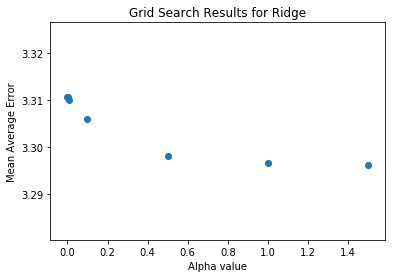

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


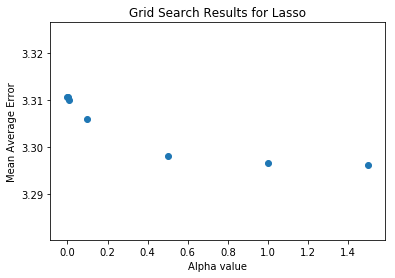

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


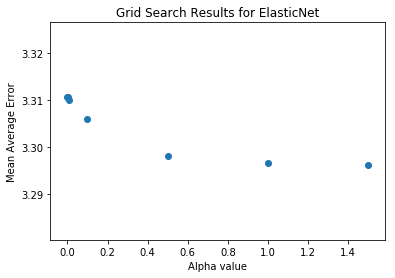

In [216]:
params1, scores1 = run_grid_search(models[1], ridge_param)
params2, scores2 = run_grid_search(models[2], lasso_param)
params3, scores3 = run_grid_search(models[3], elstic_param)

In [188]:
imps = []
for model in models:
    model.fit(X_train, y_train)
    feature_imp = model.coef_
    imps.append(feature_imp)

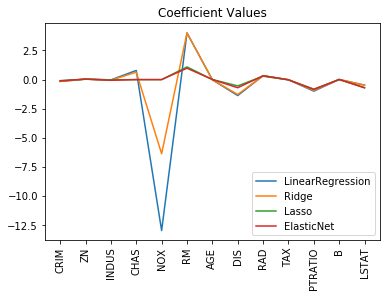

In [206]:
feature_names = list(boston.feature_names)
for i, imp in enumerate(imps):
    plt.plot(imp, label = str(models[i]).split('(')[0])
    plt.legend()
plt.title('Coefficient Values')
locs, labels = plt.xticks()
plt.xticks(np.arange(len(feature_names)), feature_names, rotation = 90)
plt.show()
